# Web scraping (ESPN NBA example)

Web scraping is the technique of collecting publicly available information on websites through an automated program. There isn't one "way" to do web scraping, it is a collection of techniques that include: accessing a public resources, parsing the resource into bits of data to be collected, and automatically iterating through the public resources to collect the data systematically. **The tools and techinques used to do these things are highly contextual**. You will need to write different code using different packages depending on the data you are trying to collect and the website you're collecting it from.

# Accessing

One of the easiest way of accessing internet resources is through the library urllib2.

In [1]:
from urllib2 import urlopen as URL # the urlopen function takes care of all the networking
# stuff that you need to do to get 
% matplotlib inline 
from matplotlib import pyplot as plt

In [2]:
url = 'http://www.espn.com/nba/team/schedule/_/name/LAL/year/2017/seasontype/2'
uopen = URL(url)

In [3]:
type(uopen) # it's an urlopen instance type

instance

In [4]:
sc = uopen.read() # the thing we want to do with instance is to read it
type(sc) # this gives you a str type

str

In [5]:
sc[:1000] # this is a preview of the first 1000 characters
# this is the page source

'<!DOCTYPE html>\n<html xmlns:fb="http://www.facebook.com/2008/fbml">\n<head><script src="http://cdn.espn.com/sports/optimizely.js"></script><meta charset="iso-8859-1">\n<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n<link rel="icon" sizes="any" mask href="http://a.espncdn.com/favicon.ico">\n<meta name="theme-color" content="#CC0000">\n<script type="text/javascript">\n    if(true && navigator && navigator.userAgent.toLowerCase().indexOf("teamstream") >= 0) {\n        window.location = \'http://m.espn.com/mobilecache/general/apps/sc\';\n    }\n</script>\n\t<script>(function(){function r(a){a=a.replace(/[\\[]/,"\\\\[").replace(/[\\]]/,"\\\\]");var c=new RegExp("[\\\\?&]"+a+"=([^&#]*)"),b=c.exec(location.search);return b==null?"":decodeURIComponent(b[1].replace(/\\+/g," "));}var p=navigator.userAgent,o=window.location,l=document.cookie,f=document.referrer,n=(f===""||f.indexOf("www.espn.com")!==-1),d=(n)?"http://m.espn.go.com/nba/teamschedule?teamId=13&src=desktop":"http:/

#### To see what this looks like in a browser, browse to this page and view page source in Chrome.
As you can see, behind the webpage is a bunchg of code that creates what you see on your page. If the data is directly embeded into the html source, then you will be able to grab the data easily. This method of web scraping is designed to deal with sites that use mostly html code.

### All this HTML code looks really messy, but it actually helps us collect the data because it's quite well structured

One way of "traversing" HTML code is to use BeautifulSoup

In [6]:
from bs4 import BeautifulSoup as BS

In [7]:
soup = BS(sc) # This may give you a warning, ignore it.

C:\Users\yangy\AppData\Local\conda\conda\envs\py27\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file C:\Users\yangy\AppData\Local\conda\conda\envs\py27\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [8]:
type(soup) # soup is now a bs4 object, that lets you find particular elements by 
# referencing their tags.

bs4.BeautifulSoup

# Parsing the data

At this point, it is useful to look at the browser to figure out where in the source code your data lies, and how the data is marked up. Right click on the data you want and then click inspect to bring up the inspection panel. It should look something like this:
![alt text](./figures/espn.png)

#### Notice that the whole table is included in the table tag with the class='tablehead'

<table cellspacing="1" cellpadding="3" class="tablehead">

In [9]:
len(soup.find_all('table', {'class':'tablehead'}))

1

In [10]:
tab = soup.find_all('table', {'class':'tablehead'})[0] # we can use this information to parse out 
# just the table that contains all of the data from the rest of our source code. [0] gets us the first result
# In this case find_all found just one result, since there's just one of these tables.
# So we know the first one must be the right one.

In [11]:
tab

<table cellpadding="3" cellspacing="1" class="tablehead"><tr class="stathead"><td colspan="9">2017 Regular Season Schedule</td></tr><tr class="colhead"><td>OCTOBER</td><td>OPPONENT</td><td>RESULT</td><td>W-L</td><td align="left" title="Points Leader">HI POINTS</td><td align="left" title="Rebounds Leader">HI REBOUNDS</td><td align="left" title="Assists Leader">HI ASSISTS</td></tr><tr class="oddrow team-46-10"><td>Wed, Oct 26</td><td><ul class="game-schedule"><li class="game-status">vs</li><li class="team-logo-small logo-nba-small"><a href="http://www.espn.com/nba/team/_/name/hou/houston-rockets"><img src="http://a.espncdn.com/combiner/i?img=/i/teamlogos/nba/500/scoreboard/Hou.png&amp;h=80&amp;w=80"/></a></li><li class="team-name"><a href="http://www.espn.com/nba/team/_/name/hou/houston-rockets">Houston</a></li></ul></td><td><ul class="game-schedule"><li class="game-status win"><span class="greenfont">W</span></li><li class="score"><a href="//www.espn.com/nba/recap/_/id/400899415">120-11

In [12]:
cols = tab.find_all('tr', {'class':'colhead'}) # this gives us all the column headers
len(cols) # there are 8 of them!

7

In [13]:
cols[0]

<tr class="colhead"><td>OCTOBER</td><td>OPPONENT</td><td>RESULT</td><td>W-L</td><td align="left" title="Points Leader">HI POINTS</td><td align="left" title="Rebounds Leader">HI REBOUNDS</td><td align="left" title="Assists Leader">HI ASSISTS</td></tr>

In [14]:
cols[0].find_all('td') # this further parses the row into td-or table data

[<td>OCTOBER</td>,
 <td>OPPONENT</td>,
 <td>RESULT</td>,
 <td>W-L</td>,
 <td align="left" title="Points Leader">HI POINTS</td>,
 <td align="left" title="Rebounds Leader">HI REBOUNDS</td>,
 <td align="left" title="Assists Leader">HI ASSISTS</td>]

In [15]:
[c.text for c in cols[0].find_all('td')]# but what we want is the text from this data
# each entry is another soup object, which has the attribute 'text'

[u'OCTOBER',
 u'OPPONENT',
 u'RESULT',
 u'W-L',
 u'HI POINTS',
 u'HI REBOUNDS',
 u'HI ASSISTS']

In [16]:
# let's use another list compreshension to do this for each of our column header rows
headers = [[c.text for c in col.find_all('td')] for col in cols]
headers

[[u'OCTOBER',
  u'OPPONENT',
  u'RESULT',
  u'W-L',
  u'HI POINTS',
  u'HI REBOUNDS',
  u'HI ASSISTS'],
 [u'NOVEMBER',
  u'OPPONENT',
  u'RESULT',
  u'W-L',
  u'HI POINTS',
  u'HI REBOUNDS',
  u'HI ASSISTS'],
 [u'DECEMBER',
  u'OPPONENT',
  u'RESULT',
  u'W-L',
  u'HI POINTS',
  u'HI REBOUNDS',
  u'HI ASSISTS'],
 [u'JANUARY',
  u'OPPONENT',
  u'RESULT',
  u'W-L',
  u'HI POINTS',
  u'HI REBOUNDS',
  u'HI ASSISTS'],
 [u'FEBRUARY',
  u'OPPONENT',
  u'RESULT',
  u'W-L',
  u'HI POINTS',
  u'HI REBOUNDS',
  u'HI ASSISTS'],
 [u'MARCH',
  u'OPPONENT',
  u'RESULT',
  u'W-L',
  u'HI POINTS',
  u'HI REBOUNDS',
  u'HI ASSISTS'],
 [u'APRIL',
  u'OPPONENT',
  u'RESULT',
  u'W-L',
  u'HI POINTS',
  u'HI REBOUNDS',
  u'HI ASSISTS']]

#### You can see that the only thing that changes is the month header, because the table is split by month

In [17]:
even = tab.find_all('tr', {'class':'evenrow'}) # notice that you can give soup a partial class name
odd = tab.find_all('tr', {'class':'oddrow'})

# the site used even and odd rows for alternating shading of the rows

In [18]:
odd[0]

<tr class="oddrow team-46-10"><td>Wed, Oct 26</td><td><ul class="game-schedule"><li class="game-status">vs</li><li class="team-logo-small logo-nba-small"><a href="http://www.espn.com/nba/team/_/name/hou/houston-rockets"><img src="http://a.espncdn.com/combiner/i?img=/i/teamlogos/nba/500/scoreboard/Hou.png&amp;h=80&amp;w=80"/></a></li><li class="team-name"><a href="http://www.espn.com/nba/team/_/name/hou/houston-rockets">Houston</a></li></ul></td><td><ul class="game-schedule"><li class="game-status win"><span class="greenfont">W</span></li><li class="score"><a href="//www.espn.com/nba/recap/_/id/400899415">120-114</a></li></ul></td><td>1-0</td><td colspan="1"><a href="http://www.espn.com/nba/player/_/id/3992/james-harden">J. Harden</a> 34</td><td colspan="1"><a href="http://www.espn.com/nba/player/_/id/3102529/clint-capela">C. Capela</a> 9</td><td colspan="1"><a href="http://www.espn.com/nba/player/_/id/3992/james-harden">J. Harden</a> 17</td></tr>

In [19]:
even[0] # each entry kinda looks like this
# notice all the data is tagged by <td>

<tr class="evenrow team-46-26"><td>Fri, Oct 28</td><td><ul class="game-schedule"><li class="game-status">@</li><li class="team-logo-small logo-nba-small"><a href="http://www.espn.com/nba/team/_/name/utah/utah-jazz"><img src="http://a.espncdn.com/combiner/i?img=/i/teamlogos/nba/500/scoreboard/UTAH.png&amp;h=80&amp;w=80"/></a></li><li class="team-name"><a href="http://www.espn.com/nba/team/_/name/utah/utah-jazz">Utah</a></li></ul></td><td><ul class="game-schedule"><li class="game-status loss"><span class="redfont">L</span></li><li class="score"><a href="//www.espn.com/nba/recap/_/id/400899458">96-89</a></li></ul></td><td>1-1</td><td colspan="1"><a href="http://www.espn.com/nba/player/_/id/3438/george-hill">G. Hill</a> 23</td><td colspan="1"><a href="http://www.espn.com/nba/player/_/id/3032976/rudy-gobert">R. Gobert</a> 13</td><td colspan="1"><a href="http://www.espn.com/nba/player/_/id/2799/lou-williams">L. Williams</a> 6</td></tr>

In [20]:
[v.text for v in even[0].find_all('td')]
# so we can use each row to find all the 'td' tags
# and then get the text from each

[u'Fri, Oct 28',
 u'@Utah',
 u'L96-89',
 u'1-1',
 u'G. Hill 23',
 u'R. Gobert 13',
 u'L. Williams 6']

In [69]:
# Let's loop through all the even and odd rows to get the text data
d1 = [[v.text for v in r.find_all('td')] for r in even]
d2 = [[v.text for v in r.find_all('td')] for r in odd]
# and join them together
d = d1+d2

len(d) # have 82 entries - NBA season has 82 games per team

82

In [70]:
import pandas as pd 
df = pd.DataFrame(d)
df.columns = headers[0] # let's use the first header, we can change the month name later

In [71]:
df.head()# Looks pretty good, we just need to change October to Date

,OCTOBER,OPPONENT,RESULT,W-L,HI POINTS,HI REBOUNDS,HI ASSISTS
0,"Fri, Oct 28",@Utah,L96-89,1-1,G. Hill 23,R. Gobert 13,L. Williams 6
1,"Wed, Nov 2",@Atlanta,W123-116,2-3,D. Howard 31,D. Howard 11,D. Russell 8
2,"Sun, Nov 6",vsPhoenix,W119-108,4-3,D. Booker 39,T. Chandler 12,D. Booker 7
3,"Thu, Nov 10",@Sacramento,W101-91,5-4,D. Cousins 28,D. Cousins 9,D. Collison 9
4,"Sun, Nov 13",@Minnesota,L125-99,6-5,A. Wiggins 47,K. Towns 12,R. Rubio 10


In [72]:
df.rename(columns = {'OCTOBER':'DATE'}, inplace = True) 
# Rename takes a dictionary from old names to new names
# Inplace = True means we replace the old df with the new df (with new col headers)

In [73]:
df.head()

,DATE,OPPONENT,RESULT,W-L,HI POINTS,HI REBOUNDS,HI ASSISTS
0,"Fri, Oct 28",@Utah,L96-89,1-1,G. Hill 23,R. Gobert 13,L. Williams 6
1,"Wed, Nov 2",@Atlanta,W123-116,2-3,D. Howard 31,D. Howard 11,D. Russell 8
2,"Sun, Nov 6",vsPhoenix,W119-108,4-3,D. Booker 39,T. Chandler 12,D. Booker 7
3,"Thu, Nov 10",@Sacramento,W101-91,5-4,D. Cousins 28,D. Cousins 9,D. Collison 9
4,"Sun, Nov 13",@Minnesota,L125-99,6-5,A. Wiggins 47,K. Towns 12,R. Rubio 10


In [56]:
df.sort_values(by='DATE')

,DATE,OPPONENT,RESULT,W-L,HI POINTS,HI REBOUNDS,HI ASSISTS
37,"Fri, Apr 7",vsSacramento,W98-94,24-55,J. Randle 25,L. Nance Jr. 11,D. Collison 10
54,"Fri, Dec 16",@Philadelphia,W100-89,11-18,J. Randle 25,L. Nance Jr. 11,T. McConnell 9
50,"Fri, Dec 2",@Toronto,L113-80,10-11,K. Lowry 24,J. Randle 8,K. Lowry 7
56,"Fri, Dec 23",@Orlando,L109-90,11-22,E. Payton 25,S. Ibaka 11,E. Payton 9
52,"Fri, Dec 9",vsPhoenix,L119-115,10-15,L. Williams 35,A. Len 14,E. Bledsoe 9
68,"Fri, Feb 10",@Milwaukee,W122-114,19-37,G. Antetokounmpo 41,G. Antetokounmpo 8,K. Middleton 6
27,"Fri, Feb 24",@Oklahoma City,L110-93,19-40,D. Russell 29,R. Westbrook 18,R. Westbrook 17
24,"Fri, Feb 3",@Boston,L113-107,17-36,I. Thomas 38,L. Nance Jr. 11,A. Horford 8
63,"Fri, Jan 20",vsIndiana,W108-95,16-31,L. Williams 27,T. Black 13,J. Teague 7
18,"Fri, Jan 6",vsMiami,W127-100,14-26,L. Williams 24,L. Deng 14,D. Russell 5


#### We basically grabbed the table from the webpage, but the data is still in awkward formats

### First let's parse the dates to make them "datelike"
Notice that the edates are all formatted with Dow, Mth DD

In [60]:
import dateparser # pip install dateparser
# from dateparser import parse
# you may need to restart the kernel for this import to work

In [57]:
df.DATE[0]

u'Fri, Oct 28'

In [61]:
dateparser.parse(df.DATE[0]) # yay it works! Except the year is wrong, booo
# we'll worry about the year later

datetime.datetime(2018, 10, 28, 0, 0)

In [62]:
df.DATE=df.DATE.map(dateparser.parse)

In [63]:
df.DATE.head()

0   2018-10-28
1   2018-11-02
2   2018-11-06
3   2018-11-10
4   2018-11-13
Name: DATE, dtype: datetime64[ns]

In [64]:
# how should the year look? for month is 10 or more, we should have 2016, else 2015?
import datetime
def _convert_year_(dt):
    if dt.month>=7:
        return datetime.date(2016, dt.month, dt.day)
    else:
        return datetime.date(2017, dt.month, dt.day)

In [65]:
df.DATE = df.DATE.map(_convert_year_)

In [66]:
df.DATE.head() #YAY

0    2016-10-28
1    2016-11-02
2    2016-11-06
3    2016-11-10
4    2016-11-13
Name: DATE, dtype: object

In [68]:
df.sort_values(by='DATE', ascending = True,inplace = True)
df.head()

,DATE,OPPONENT,RESULT,W-L,HI POINTS,HI REBOUNDS,HI ASSISTS
39,2016-10-26,vsHouston,W120-114,1-0,J. Harden 34,C. Capela 9,J. Harden 17
0,2016-10-28,@Utah,L96-89,1-1,G. Hill 23,R. Gobert 13,L. Williams 6
40,2016-10-30,@Oklahoma City,L113-96,1-2,R. Westbrook 33,S. Adams 12,R. Westbrook 16
41,2016-11-01,@Indiana,L115-108,1-3,P. George 30,J. Randle 10,J. Teague 6
1,2016-11-02,@Atlanta,W123-116,2-3,D. Howard 31,D. Howard 11,D. Russell 8


### Convert dates the hard way

In [74]:
dt = df.DATE[0]
dt

u'Fri, Oct 28'

In [75]:
dt.split(',')

[u'Fri', u' Oct 28']

In [76]:
dt.split(',')[-1]

u' Oct 28'

In [77]:
dt.split(',')[-1].strip()

u'Oct 28'

In [79]:
dt.split(',')[-1].strip().split(' ')

[u'Oct', u'28']

In [82]:
mthnumber = range(1,13)
mthnumber

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [83]:
mthtext= ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
mthtext

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

In [84]:
mthdict = dict(zip(mthtext, mthnumber))
mthdict

{'Apr': 4,
 'Aug': 8,
 'Dec': 12,
 'Feb': 2,
 'Jan': 1,
 'Jul': 7,
 'Jun': 6,
 'Mar': 3,
 'May': 5,
 'Nov': 11,
 'Oct': 10,
 'Sep': 9}

In [90]:
dt2 = dt.split(',')[-1].strip().split(' ')
dt2

[u'Oct', u'28']

In [89]:
mthdict[dt2[0]], int(dt2[1])

(10, 28)

In [92]:
def date_conversion(dt, season):
    dt2 = dt.split(',')[-1].strip().split(' ')
    mth = mthdict[dt2[0]]
    day = int(dt2[1])
    if mth>=7:
        yr = season -1
    else:
        yr = season
    return datetime.date(yr,mth ,day)
    

In [96]:
dt = df.DATE[1]
dt

u'Wed, Nov 2'

In [97]:
date_conversion(dt, 2017)

datetime.date(2016, 11, 2)

In [98]:
df.DATE = df.DATE.apply(lambda x: date_conversion(x, 2017))

In [101]:
df.DATE = pd.to_datetime(df.DATE)

# Next, let's get rid of the @ and vs in the OPPONENT column, and create a new column for HOME (1 for home, 0 for away)

In [102]:
df.head()

,DATE,OPPONENT,RESULT,W-L,HI POINTS,HI REBOUNDS,HI ASSISTS
0,2016-10-28,@Utah,L96-89,1-1,G. Hill 23,R. Gobert 13,L. Williams 6
1,2016-11-02,@Atlanta,W123-116,2-3,D. Howard 31,D. Howard 11,D. Russell 8
2,2016-11-06,vsPhoenix,W119-108,4-3,D. Booker 39,T. Chandler 12,D. Booker 7
3,2016-11-10,@Sacramento,W101-91,5-4,D. Cousins 28,D. Cousins 9,D. Collison 9
4,2016-11-13,@Minnesota,L125-99,6-5,A. Wiggins 47,K. Towns 12,R. Rubio 10


In [103]:
def _home_(opp):
    if opp[0] == '@':
        return 0
    else:
        return 1

In [104]:
df['HOME'] = df.OPPONENT.map(_home_)

In [105]:
df.head() # yay!

,DATE,OPPONENT,RESULT,W-L,HI POINTS,HI REBOUNDS,HI ASSISTS,HOME
0,2016-10-28,@Utah,L96-89,1-1,G. Hill 23,R. Gobert 13,L. Williams 6,0
1,2016-11-02,@Atlanta,W123-116,2-3,D. Howard 31,D. Howard 11,D. Russell 8,0
2,2016-11-06,vsPhoenix,W119-108,4-3,D. Booker 39,T. Chandler 12,D. Booker 7,1
3,2016-11-10,@Sacramento,W101-91,5-4,D. Cousins 28,D. Cousins 9,D. Collison 9,0
4,2016-11-13,@Minnesota,L125-99,6-5,A. Wiggins 47,K. Towns 12,R. Rubio 10,0


In [106]:
# get rid of the @'s and vs's
df.loc[df.HOME==1, 'OPPONENT'] = df.loc[df.HOME==1, 'OPPONENT'].apply(lambda x: x[2:])
df.loc[df.HOME==0, 'OPPONENT'] = df.loc[df.HOME==0, 'OPPONENT'].apply(lambda x: x[1:])
df.head()

,DATE,OPPONENT,RESULT,W-L,HI POINTS,HI REBOUNDS,HI ASSISTS,HOME
0,2016-10-28,Utah,L96-89,1-1,G. Hill 23,R. Gobert 13,L. Williams 6,0
1,2016-11-02,Atlanta,W123-116,2-3,D. Howard 31,D. Howard 11,D. Russell 8,0
2,2016-11-06,Phoenix,W119-108,4-3,D. Booker 39,T. Chandler 12,D. Booker 7,1
3,2016-11-10,Sacramento,W101-91,5-4,D. Cousins 28,D. Cousins 9,D. Collison 9,0
4,2016-11-13,Minnesota,L125-99,6-5,A. Wiggins 47,K. Towns 12,R. Rubio 10,0


# Next, we can get rid of all L's and W's, and create a new a column for Win (1=W, 0=L)

In [107]:
def _WL_(wl):
    if wl[0] == 'W': # if the first character is W
        return 1 # return 1
    else:
        return 0 # otherwise return 0

In [108]:
df['W'] = df.RESULT.map(_WL_)
df.head()

,DATE,OPPONENT,RESULT,W-L,HI POINTS,HI REBOUNDS,HI ASSISTS,HOME,W
0,2016-10-28,Utah,L96-89,1-1,G. Hill 23,R. Gobert 13,L. Williams 6,0,0
1,2016-11-02,Atlanta,W123-116,2-3,D. Howard 31,D. Howard 11,D. Russell 8,0,1
2,2016-11-06,Phoenix,W119-108,4-3,D. Booker 39,T. Chandler 12,D. Booker 7,1,1
3,2016-11-10,Sacramento,W101-91,5-4,D. Cousins 28,D. Cousins 9,D. Collison 9,0,1
4,2016-11-13,Minnesota,L125-99,6-5,A. Wiggins 47,K. Towns 12,R. Rubio 10,0,0


### Let's grab the scores and make one column for lakers and one column for opponent

#### We can use regular expressions to do this
A regular expression is a text manipulating tool that looks for patterns in text.
Here, we want to extract from each result row the two sequences of numbers. 

In [42]:
import re
r = df.RESULT[0]
r

u'L96-89'

In [109]:
import re
r = df.RESULT[0]
re.findall('[0-9]+', r) 
# What this says is look for patterns that contain the characters inside '[]'
# 0-9 indicates characters from the range of 0 to 9, inclusive
# The + outside the []'s means look for contiguous 
# patterns that contain at least 1 character that belongs in this set.
# As a result, we are able to locate 2 groups of contiguous numeric characters, the 2 scores.

[u'96', u'89']

In [110]:
df['Score'] = df.RESULT.apply(lambda x: re.findall('[0-9]+', x))
df.head()

,DATE,OPPONENT,RESULT,W-L,HI POINTS,HI REBOUNDS,HI ASSISTS,HOME,W,Score
0,2016-10-28,Utah,L96-89,1-1,G. Hill 23,R. Gobert 13,L. Williams 6,0,0,"[96, 89]"
1,2016-11-02,Atlanta,W123-116,2-3,D. Howard 31,D. Howard 11,D. Russell 8,0,1,"[123, 116]"
2,2016-11-06,Phoenix,W119-108,4-3,D. Booker 39,T. Chandler 12,D. Booker 7,1,1,"[119, 108]"
3,2016-11-10,Sacramento,W101-91,5-4,D. Cousins 28,D. Cousins 9,D. Collison 9,0,1,"[101, 91]"
4,2016-11-13,Minnesota,L125-99,6-5,A. Wiggins 47,K. Towns 12,R. Rubio 10,0,0,"[125, 99]"


In [111]:
# If the team won, we want the maximum of this list
# Otherwise, we want the minimum of this score
# There are no ties in basketball
def _sc_(w, sc):
    sc = [int(s) for s in sc] # convert strings to integers
    if w == 1:
        return max(sc)
    else: 
        return min(sc)
df['Team_Score'] = df[['Score', 'W']].apply(lambda x: _sc_(x['W'], x['Score']), axis =1)
df['Opponent_Score'] = df[['Score', 'W']].apply(lambda x: _sc_(-x['W']+1, x['Score']), axis =1)
# Why did the opponent_score work using the same function?
df.head()

,DATE,OPPONENT,RESULT,W-L,HI POINTS,HI REBOUNDS,HI ASSISTS,HOME,W,Score,Team_Score,Opponent_Score
0,2016-10-28,Utah,L96-89,1-1,G. Hill 23,R. Gobert 13,L. Williams 6,0,0,"[96, 89]",89,96
1,2016-11-02,Atlanta,W123-116,2-3,D. Howard 31,D. Howard 11,D. Russell 8,0,1,"[123, 116]",123,116
2,2016-11-06,Phoenix,W119-108,4-3,D. Booker 39,T. Chandler 12,D. Booker 7,1,1,"[119, 108]",119,108
3,2016-11-10,Sacramento,W101-91,5-4,D. Cousins 28,D. Cousins 9,D. Collison 9,0,1,"[101, 91]",101,91
4,2016-11-13,Minnesota,L125-99,6-5,A. Wiggins 47,K. Towns 12,R. Rubio 10,0,0,"[125, 99]",99,125


In [112]:
df['point_diff'] = df.Team_Score-df.Opponent_Score

In [113]:
df['ym'] = df.DATE.apply(lambda x: datetime.date(x.year, x.month, 1))

In [114]:
df.head()

,DATE,OPPONENT,RESULT,W-L,HI POINTS,HI REBOUNDS,HI ASSISTS,HOME,W,Score,Team_Score,Opponent_Score,point_diff,ym
0,2016-10-28,Utah,L96-89,1-1,G. Hill 23,R. Gobert 13,L. Williams 6,0,0,"[96, 89]",89,96,-7,2016-10-01
1,2016-11-02,Atlanta,W123-116,2-3,D. Howard 31,D. Howard 11,D. Russell 8,0,1,"[123, 116]",123,116,7,2016-11-01
2,2016-11-06,Phoenix,W119-108,4-3,D. Booker 39,T. Chandler 12,D. Booker 7,1,1,"[119, 108]",119,108,11,2016-11-01
3,2016-11-10,Sacramento,W101-91,5-4,D. Cousins 28,D. Cousins 9,D. Collison 9,0,1,"[101, 91]",101,91,10,2016-11-01
4,2016-11-13,Minnesota,L125-99,6-5,A. Wiggins 47,K. Towns 12,R. Rubio 10,0,0,"[125, 99]",99,125,-26,2016-11-01


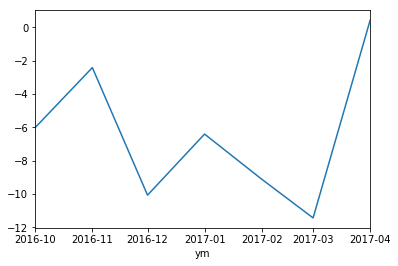

In [115]:
df.groupby('ym')['point_diff'].mean().plot()